In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
import os.path as osp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

from keras.layers import Dense, Flatten, Embedding, Multiply, Concatenate, Input
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Sequential

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

def fix_all_seeds(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
fix_all_seeds(2021)

def fix_all_seeds(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
fix_all_seeds(2021)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##################################################################################
Start distribution mode: balanced
##################################################################################
##################################################################################
Start distribution mode: unbalanced_label
##################################################################################
##################################################################################
Start distribution mode: unbalanced_labels_size
##################################################################################


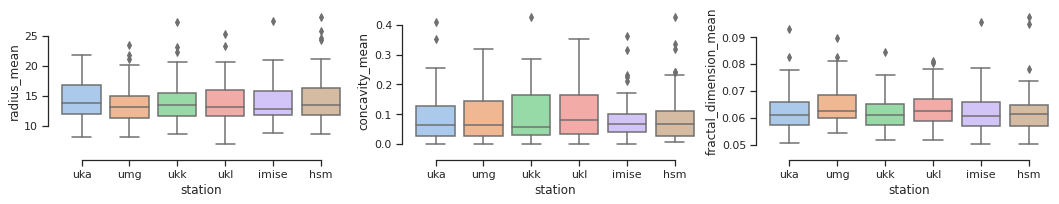

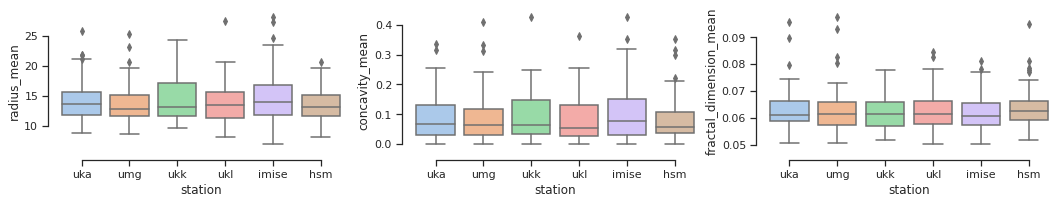

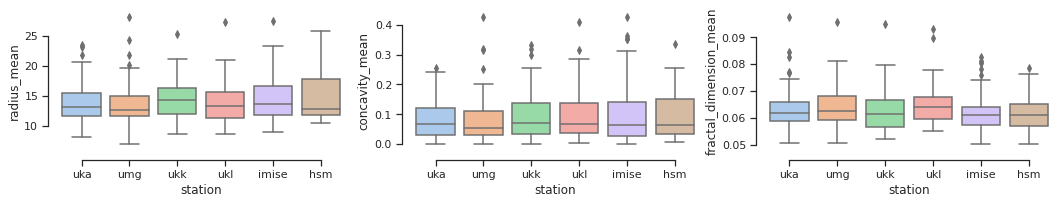

In [4]:
DISTRIBUTION_MODES = ["balanced", "unbalanced_label", "unbalanced_labels_size"]
X_FEATURES = ['radius_mean', 'texture_mean', 'perimeter_mean',
              'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
              'concave points_mean', 'concavity_mean', 'fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
              'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
              'fractal_dimension_se', 'radius_worst', 'texture_worst',
              'perimeter_worst', 'area_worst', 'smoothness_worst',
              'compactness_worst', 'concavity_worst', 'concave points_worst',
              'symmetry_worst', 'fractal_dimension_worst']
Y_FEATURE = 'diagnosis'
BASE_DIR = "/content/drive/MyDrive/DSM-AS/input"
OUTPUT_DIR = "/content/drive/MyDrive/DSM-AS/output"



if not osp.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

plot_feats = ["radius_mean", "fractal_dimension_mean", "concavity_mean"]#, "compactness_mean"]
# distribution_mode = DISTRIBUTION_MODES[0]
# df_data = pd.read_csv(osp.join(BASE_DIR, "data.csv"))
# df_data = df_data.drop(["Unnamed: 32"], axis=1)
# station_list = ["uka", "umg", "ukk", "ukl", "imise", "hsm"]
# station_dfs = [pd.read_csv(osp.join(BASE_DIR, "{}/{}.csv".format(distribution_mode, station))).rename(columns={"patient_id":"id"}) for station in station_list]
# final_test_df = pd.read_csv(osp.join(BASE_DIR, "{}/final_test.csv".format(distribution_mode))).rename(columns={"patient_id":"id"})
# for idx in range(len(station_list)):
#     station_dfs[idx]["id"] = station_dfs[idx]["id"].map(lambda x: int(x[6:]))
#     station_dfs[idx] = pd.merge(df_data, station_dfs[idx], on='id', how='right')
# final_test_df["id"] = final_test_df["id"].map(lambda x: int(x[6:]))
# final_test_df = pd.merge(df_data, final_test_df, on='id', how='right')
# # df_count = []
# # for idx in range(len(station_dfs)):
# #     B, M = station_dfs[idx]["diagnosis"].value_counts()
# #     df_count.append([len(station_dfs[idx]), B, M])
# # B, M = final_test_df["diagnosis"].value_counts()
# # df_count.append([len(final_test_df), B, M])
# # df_count = pd.DataFrame(df_count, columns=["counts", "B", "M"])
# # df_count["station"] = pd.Series(station_list+["final test"])
# # df_mean_X = []
# # df_std_X = []
# # for idx in range(len(station_list)):
# #     df_mean_X.append(np.mean(station_dfs[idx][X_FEATURES], axis=0).to_numpy())
# #     df_std_X.append(np.std(station_dfs[idx][X_FEATURES], axis=0).to_numpy())
# # df_mean_X.append(np.mean(final_test_df[X_FEATURES], axis=0).to_numpy())
# # df_std_X.append(np.std(final_test_df[X_FEATURES], axis=0).to_numpy())
# # df_mean_X = pd.DataFrame(df_mean_X, columns=X_FEATURES)
# # df_std_X = pd.DataFrame(df_std_X, columns=X_FEATURES)
# # df_mean_X["station"] = pd.Series(station_list+["final test"])
# # df_std_X["station"] = pd.Series(station_list+["final test"])

# for idx in range(len(station_list)):
#     station_dfs[idx]["station"] = station_list[idx]
# eda_df = pd.concat(station_dfs)

# plt.figure(figsize = (30,28))
# sns.set_theme(style="ticks", palette="pastel")
# for i, col in enumerate(eda_df.select_dtypes('number').columns):
#     if i == 0:
#       pass
#     else:
#       plt.subplot(6,5,i)
#       sns.boxplot(x="station", y=col, data=eda_df)
#       sns.despine(offset=10, trim=True)
# # plt.show()
# plt.savefig(osp.join(OUTPUT_DIR, f"feats_boxplots_{distribution_mode}.png"))
# import skimage
# import skimage.io
# image = skimage.io.imread(osp.join(OUTPUT_DIR, f"feats_boxplots_{distribution_mode}.png"))
# # plt.imshow(image)
# # # plt.imshow(image[200:1816,200:1960,:])
# image_resize = image[200:1816,200:1960,:]
# skimage.io.imsave(osp.join(OUTPUT_DIR, f"feats_boxplots_{distribution_mode}.png"),image_resize)

# # plt.figure(figsize = (30,28))
# # for i, col in enumerate(station_dfs[0].select_dtypes('number').columns):
# #     if i == 0:
# #       pass
# #     else:
# #       plt.subplot(6,5,i)
# #       sns.histplot(x=col, kde=True, hue='diagnosis', data=station_dfs[0])
# # # plt.show()
# # plt.savefig(osp.join(OUTPUT_DIR, "m_b_feats.png"))
# # import skimage
# # import skimage.io
# # image = skimage.io.imread(osp.join(OUTPUT_DIR, "m_b_feats.png"))
# # print(image.shape)
# # plt.imshow(image)
# # # plt.imshow(image[200:1816,200:1960,:])
# # image_resize = image[200:1816,200:1960,:]
# # skimage.io.imsave(osp.join(OUTPUT_DIR, "m_b_feats_resize.png"),image_resize)

plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels  
df_counts = []
for distribution_mode in DISTRIBUTION_MODES:
    print("##################################################################################")
    print("Start distribution mode: {}".format(distribution_mode))
    print("##################################################################################")
    df_data = pd.read_csv(osp.join(BASE_DIR, "data.csv"))
    df_data = df_data.drop(["Unnamed: 32"], axis=1)
    station_list = ["uka", "umg", "ukk", "ukl", "imise", "hsm"]
    station_dfs = [pd.read_csv(osp.join(BASE_DIR, "{}/{}.csv".format(distribution_mode, station))).rename(columns={"patient_id":"id"}) for station in station_list]
    final_test_df = pd.read_csv(osp.join(BASE_DIR, "{}/final_test.csv".format(distribution_mode))).rename(columns={"patient_id":"id"})
    for idx in range(len(station_list)):
        station_dfs[idx]["id"] = station_dfs[idx]["id"].map(lambda x: int(x[6:]))
        station_dfs[idx] = pd.merge(df_data, station_dfs[idx], on='id', how='right')
    final_test_df["id"] = final_test_df["id"].map(lambda x: int(x[6:]))
    final_test_df = pd.merge(df_data, final_test_df, on='id', how='right')
    for idx in range(len(station_list)):
        station_dfs[idx]["station"] = station_list[idx]
    eda_df = pd.concat(station_dfs)
    plt.figure(figsize = (15,3))
    sns.set_theme(style="ticks", palette="pastel")
    j = 0
    for i, col in enumerate(eda_df.select_dtypes('number').columns):
        # if i == 0:
        #   pass
        # else:
        #   plt.subplot(8,4,i)
        #   plt.tight_layout()
        #   sns.boxplot(x="station", y=col, data=eda_df)
        #   sns.despine(offset=10, trim=True)

        if col in plot_feats:
          plt.subplot(1,3,j+1)
          plt.tight_layout()
          sns.boxplot(x="station", y=col, data=eda_df)
          sns.despine(offset=10, trim=True)
          j = j + 1
    # plt.show()
    plt.savefig(osp.join(OUTPUT_DIR, f"feats_boxplots_{distribution_mode}.png"))
    # import skimage
    # import skimage.io
    # image = skimage.io.imread(osp.join(OUTPUT_DIR, f"feats_boxplots_{distribution_mode}.png"))
    # # plt.imshow(image)
    # # # plt.imshow(image[200:1816,200:1960,:])
    # image_resize = image[200:1816,200:1960,:]
    # skimage.io.imsave(osp.join(OUTPUT_DIR, f"feats_boxplots_{distribution_mode}.png"),image_resize)


    # df_count = []
    # for idx in range(len(station_dfs)):
    #     B, M = station_dfs[idx]["diagnosis"].value_counts()
    #     df_count.append([len(station_dfs[idx]), B, M])
    # B, M = final_test_df["diagnosis"].value_counts()
    # df_count.append([len(final_test_df), B, M])
    # df_count = pd.DataFrame(df_count, columns=["counts", "B", "M"])
    # df_count["station"] = pd.Series(station_list+["final test"])
    # df_counts.append(df_count)


In [5]:
df_counts[1]

IndexError: ignored